# Imports

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data & Quick Overview

In [66]:
df = pd.read_csv('netflix_titles.csv')

In [67]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [68]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [69]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Cleaning Data

In [70]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [71]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')
df['duration'] = df['duration'].fillna('Unknown')
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Average Time to add to Netflix over the last 20 years (Movies vs TV Shows)

Calculating time to release for TV Shows and Movies on Netflix

In [72]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

tv_shows = df.loc[df['type'] == 'TV Show'].copy()
movies = df.loc[df['type'] == 'Movie'].copy()

# Calculate TTR (Time To Release) columns
tv_shows['ttr'] = tv_shows['year_added'] - tv_shows['release_year']
movies['ttr'] = movies['year_added'] - movies['release_year']

# Filter out rows where TTR is negative or NaN
tv_shows = tv_shows[tv_shows['ttr'] >= 0]
movies = movies[movies['ttr'] >= 0]


shows_ttr_mean = round(tv_shows['ttr'].mean(), 1)
movies_ttr_mean = round(movies['ttr'].mean(), 1)

Plotting Values

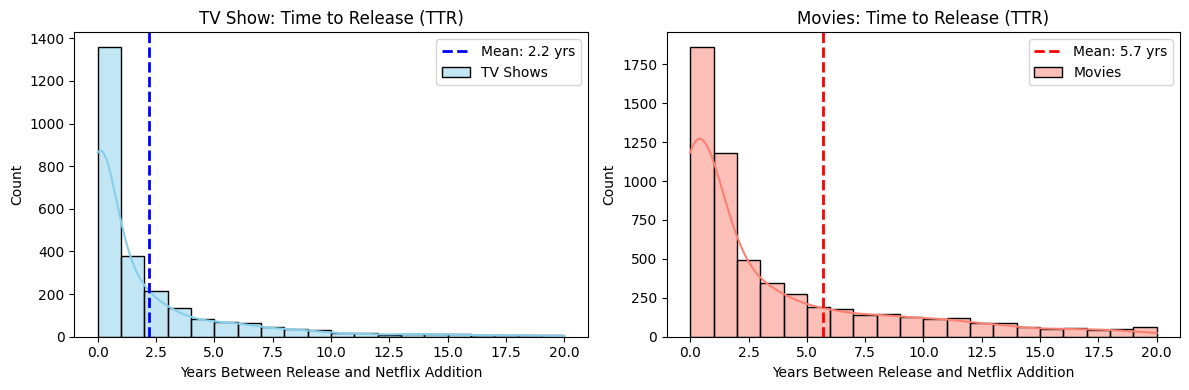

In [78]:
# Define a cutoff for zoomed-in view
cutoff = 20

# Filtered data for zoomed-in histograms
tv_shows_zoomed = tv_shows[tv_shows['ttr'] <= cutoff]
movies_zoomed = movies[movies['ttr'] <= cutoff]

# Plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(tv_shows_zoomed['ttr'], kde=True, color='skyblue', label='TV Shows', bins=20)
plt.axvline(shows_ttr_mean, color='blue', linestyle='--', linewidth=2, label=f'Mean: {shows_ttr_mean} yrs')
plt.title('TV Show: Time to Release (TTR)')
plt.xlabel('Years Between Release and Netflix Addition')
plt.ylabel('Count')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
sns.histplot(movies_zoomed['ttr'], kde=True, color='salmon', label='Movies', bins=20)
plt.axvline(movies_ttr_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {movies_ttr_mean} yrs')
plt.title('Movies: Time to Release (TTR)')
plt.xlabel('Years Between Release and Netflix Addition')
plt.ylabel('Count')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
